In [ ]:
from flyingpigeon import weatherregimes as wr
from flyingpigeon import utils
from os import listdir, path

p = '/home/nils/.conda/envs/birdhouse/var/lib/cache/pywps/www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.dailyavgs/surface'
resources = [path.join(p,f) for f in listdir(p)]

In [11]:
resources = '/home/nils/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-P/historical/day/atmos/day/r1i1p1/v20120315/psl/psl_day_MPI-ESM-P_historical_r1i1p1_20000101-20051231.nc'

In [12]:
nc = wr.subset(resources, bbox="-80,50,22.5,70", time_region='12,1,2')

start ocgis module


In [13]:
from flyingpigeon.visualisation import plot_kMEAN, plot_pressuremap, concat_images
from IPython.display import Image

variable name: psl


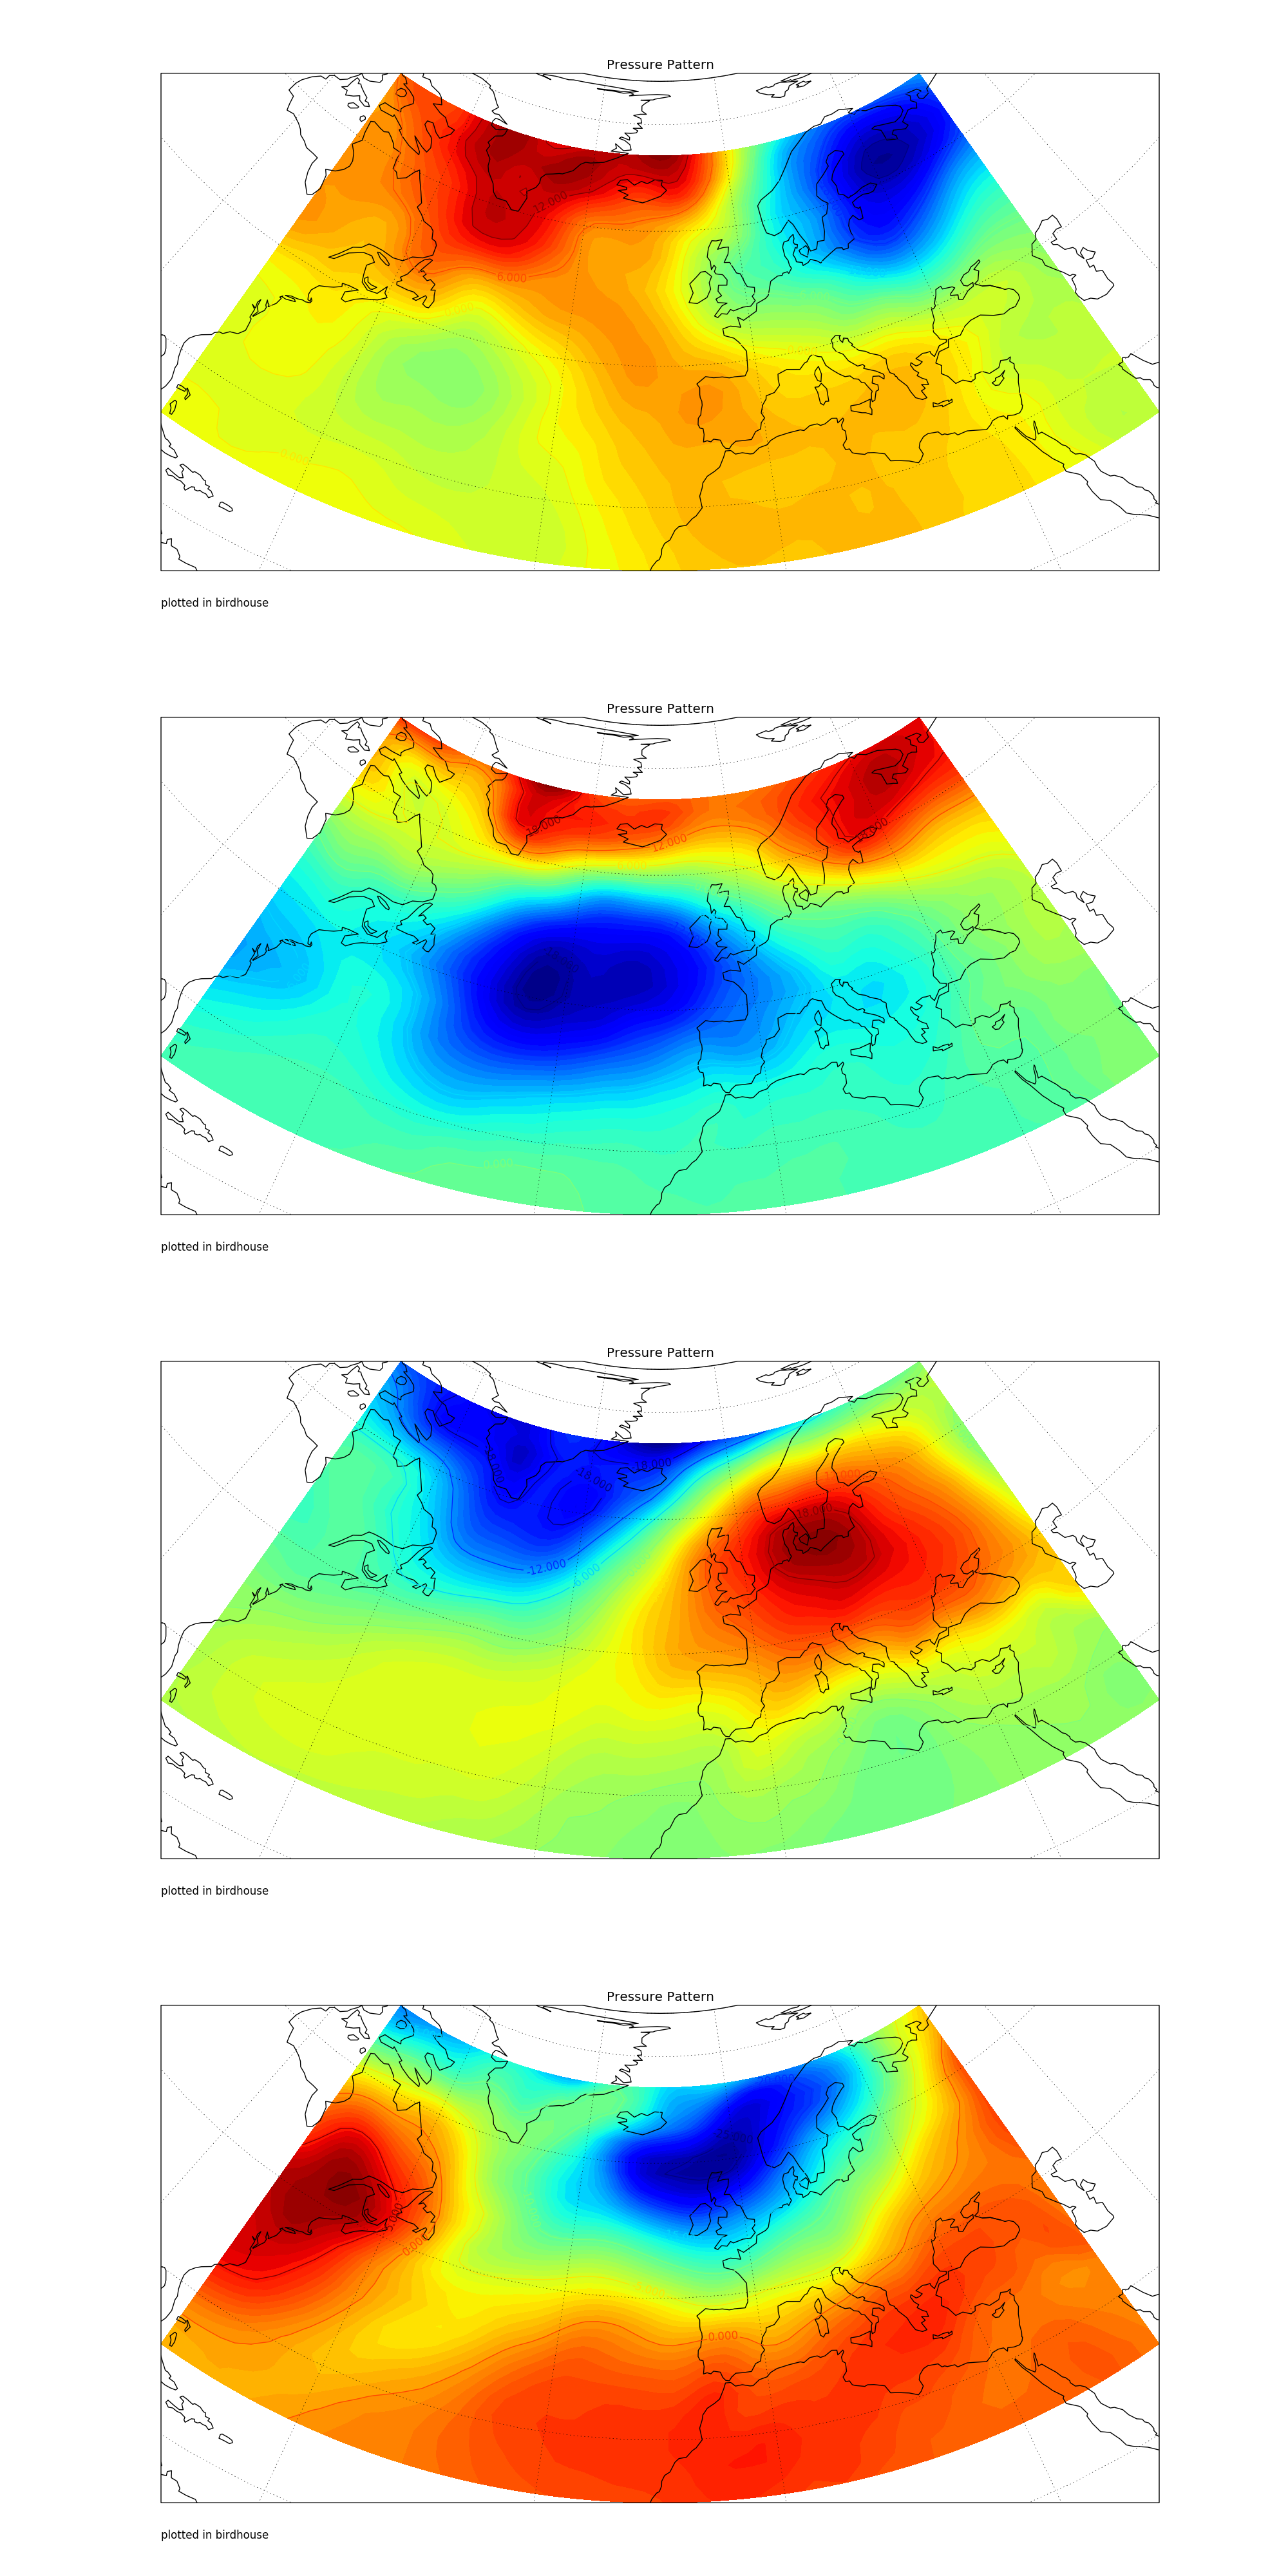

In [14]:
from numpy import ma
pca = wr.get_pca(nc)
kmeans = wr.calc_kMEAN(pca)
dist = kmeans.fit_transform(pca)
c = dist.argsort()[:,3]

lats, lons = utils.get_coordinates(nc)
data = utils.get_values(nc)

img = []
for i in [0,1,2,3]:
    d_mask = ma.masked_array(dist[:,i], mask=(c==i)) # x = MaskedArray(data, mask=nomask,)
    regime = d_mask.argsort()[0:10]
    img.append(plot_pressuremap(data[regime],lats=lats, lons=lons))

con = concat_images(img)
Image(filename=con)